# Exploratory Data Analysis (EDA)

## Project Scope:

One of your clients is a large real estate investment company. They invest in houses, appartments and condos within a small county in New York state. As a part of their business, they want to try and predict the fair transaction price of a property before it's sold.

**Current solution:** The company currently uses a third party appraisal service. Appraisers are professionals who visit a property and estimate a fair price using their expertise or their own sets of metrics and checklists. Unfortunately, the skill levels of appraisers can vary greatly. The company compared the appraiser prices to actual transaction prices and they found that the estimates given by the inexperienced appraisers were **off by $70,000** on average.

**Your role:** The company has hired you to find a data driven approach to value properties. They currently have a dataset for transaction prices for previously sold properties on the market and your goal is to build a real estate pricing model using that dataset.

**Goal:** Build a model to predict transaction prices with an average error of under $70,000.

**Specifics:** 

* Machine Learning task: Regression model 
* Target variable: Transaction price 
* Input variables: Refer to data dictionary file - "Real Estate Project - Data Dictionary" 
* Success Criteria: Mean Absolute Error (MAE) < $70,000

This project will be carried out in 4 stages

1. **Exploratory Data Analysis: Data understanding and generating insights**
2. Data Cleaning & Data Preparation: Preparing data for Modelling
3. Data Modelling: Experimenting with different algorithms
4. Model Evaluation: Evaluate using performance metrics

## Welcome to Exploratory Data Analysis (EDA)

Our goal with this lecture is to **"get to know"** the data. Try to learn as much about the data as possible, but don't spend too much time and get stuck on this step. You will probably need to do ad-hoc data exploration later. Remember, the **CRISP-DM** process is iterative.

#### Import the libraries we need.

In [118]:
# Pandas for Data Manipulation
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

* `%matplotlib inline` helps plot the chart without having to use `plt.show( )` everytime. This is useful in Jupyter, but in IDE' like Spyder, we have to do `plt.show( )` to see the chart.

#### Import the dataset.

In [119]:
# Load 'real_estate.csv' in a pandas dataframe 'df'
df = pd.read_csv('real_estate.csv')

The first step to understanding your dataset is to display its basic information. This will give you a high-level understanding of your dataset's structure, features, and values.

In [120]:
# print the dataset using .head()
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df.head()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,property_type
0,295850,2013,234,81,1,1,584,2013,0,NaN,Condo
1,216500,2006,169,51,1,1,612,1965,0,1.0,Condo
2,279900,2012,216,74,1,1,615,1963,0,NaN,Condo
3,379900,2005,265,92,1,1,618,2000,33541,NaN,Condo
4,340000,2002,88,30,1,1,634,1992,0,NaN,Condo


The purpose of displaying examples from the dataset is not to perform rigorous analysis. Instead, try to get a qualitative "feel" for the dataset.

Answer these questions below:

* Do the columns make sense?
* Do the values in those columns make sense?
* Is missing data going to be a big problem based on an eyeball test?
* What types of classes are there?

Spend a couple minutes looking over the data to get familiar with it.

Finally, it's also helpful to look at the last 5 rows of data.
* Sometimes datasets will have **corrupted data** hiding at the very end (depending on the data source).
* It never hurts to double-check.

In [121]:
# Display the last 5 rows of data.
df.tail(5)

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,property_type
1878,385000,2002,1250,381,5,6,6381,2004,224334,1.0,Bunglow
1879,690000,2015,1553,473,5,6,6501,1956,23086,1.0,Bunglow
1880,600000,1999,942,287,5,6,7064,1995,217800,1.0,Bunglow
1881,759900,2009,803,245,5,6,7500,2006,8886,1.0,Bunglow
1882,735000,2015,1459,444,5,6,7515,1958,10497,1.0,Bunglow


In [122]:
# look at the shape, or the dimensions of the dataset using the '.shape' attribute
# Dataframe dimensions
df.shape

(1883, 11)

As you can see, we have **1883 observations and 11 features**. One of those features is technically the target variable.

### Next, let's take a look at the data types of our features.

In [123]:
# Print column datatypes using .dtypes
df.dtypes

price              int64
year_sold          int64
property_tax       int64
insurance          int64
beds               int64
baths              int64
sqft               int64
year_built         int64
lot_size           int64
basement         float64
property_type     object
dtype: object

In [124]:
# more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1883 non-null   int64  
 1   year_sold      1883 non-null   int64  
 2   property_tax   1883 non-null   int64  
 3   insurance      1883 non-null   int64  
 4   beds           1883 non-null   int64  
 5   baths          1883 non-null   int64  
 6   sqft           1883 non-null   int64  
 7   year_built     1883 non-null   int64  
 8   lot_size       1883 non-null   int64  
 9   basement       1657 non-null   float64
 10  property_type  1883 non-null   object 
dtypes: float64(1), int64(9), object(1)
memory usage: 161.9+ KB


As you can see, all of the columns are numeric, except for 1 categorical column:

* `'property_type'`

Now check to see if any data types are incorrect.

* Check if any numeric features should be categorical instead based on what you know about the dataset.
* Or, check if any categorical features should be numeric instead.
* It's fine if you are unsure about some columns, as we'll continue to explore them.

## Distributions

One of the most enlightening data exploration tasks is plotting the distributions of your features.

**Here are a few things to look out for:**
* Distributions that don't make sense (e.g a large spike in houses with 10 bedrooms)
* Potential outliers that don't make sense
* Sparse data
* Numeric features that should be categorical
* Features that should be binary
* Boundaries that don't make sense (e.g. percent values above 100 or below 0)

The easiest way to display distributions of numeric features is by using seaborn' Pairplot.
* Seaborn comes with a `.pairplot()` function that plots the distributions of all of the numeric features.
* Also call `plt.show()` to clear all of the text "residue" and just keep the plot.

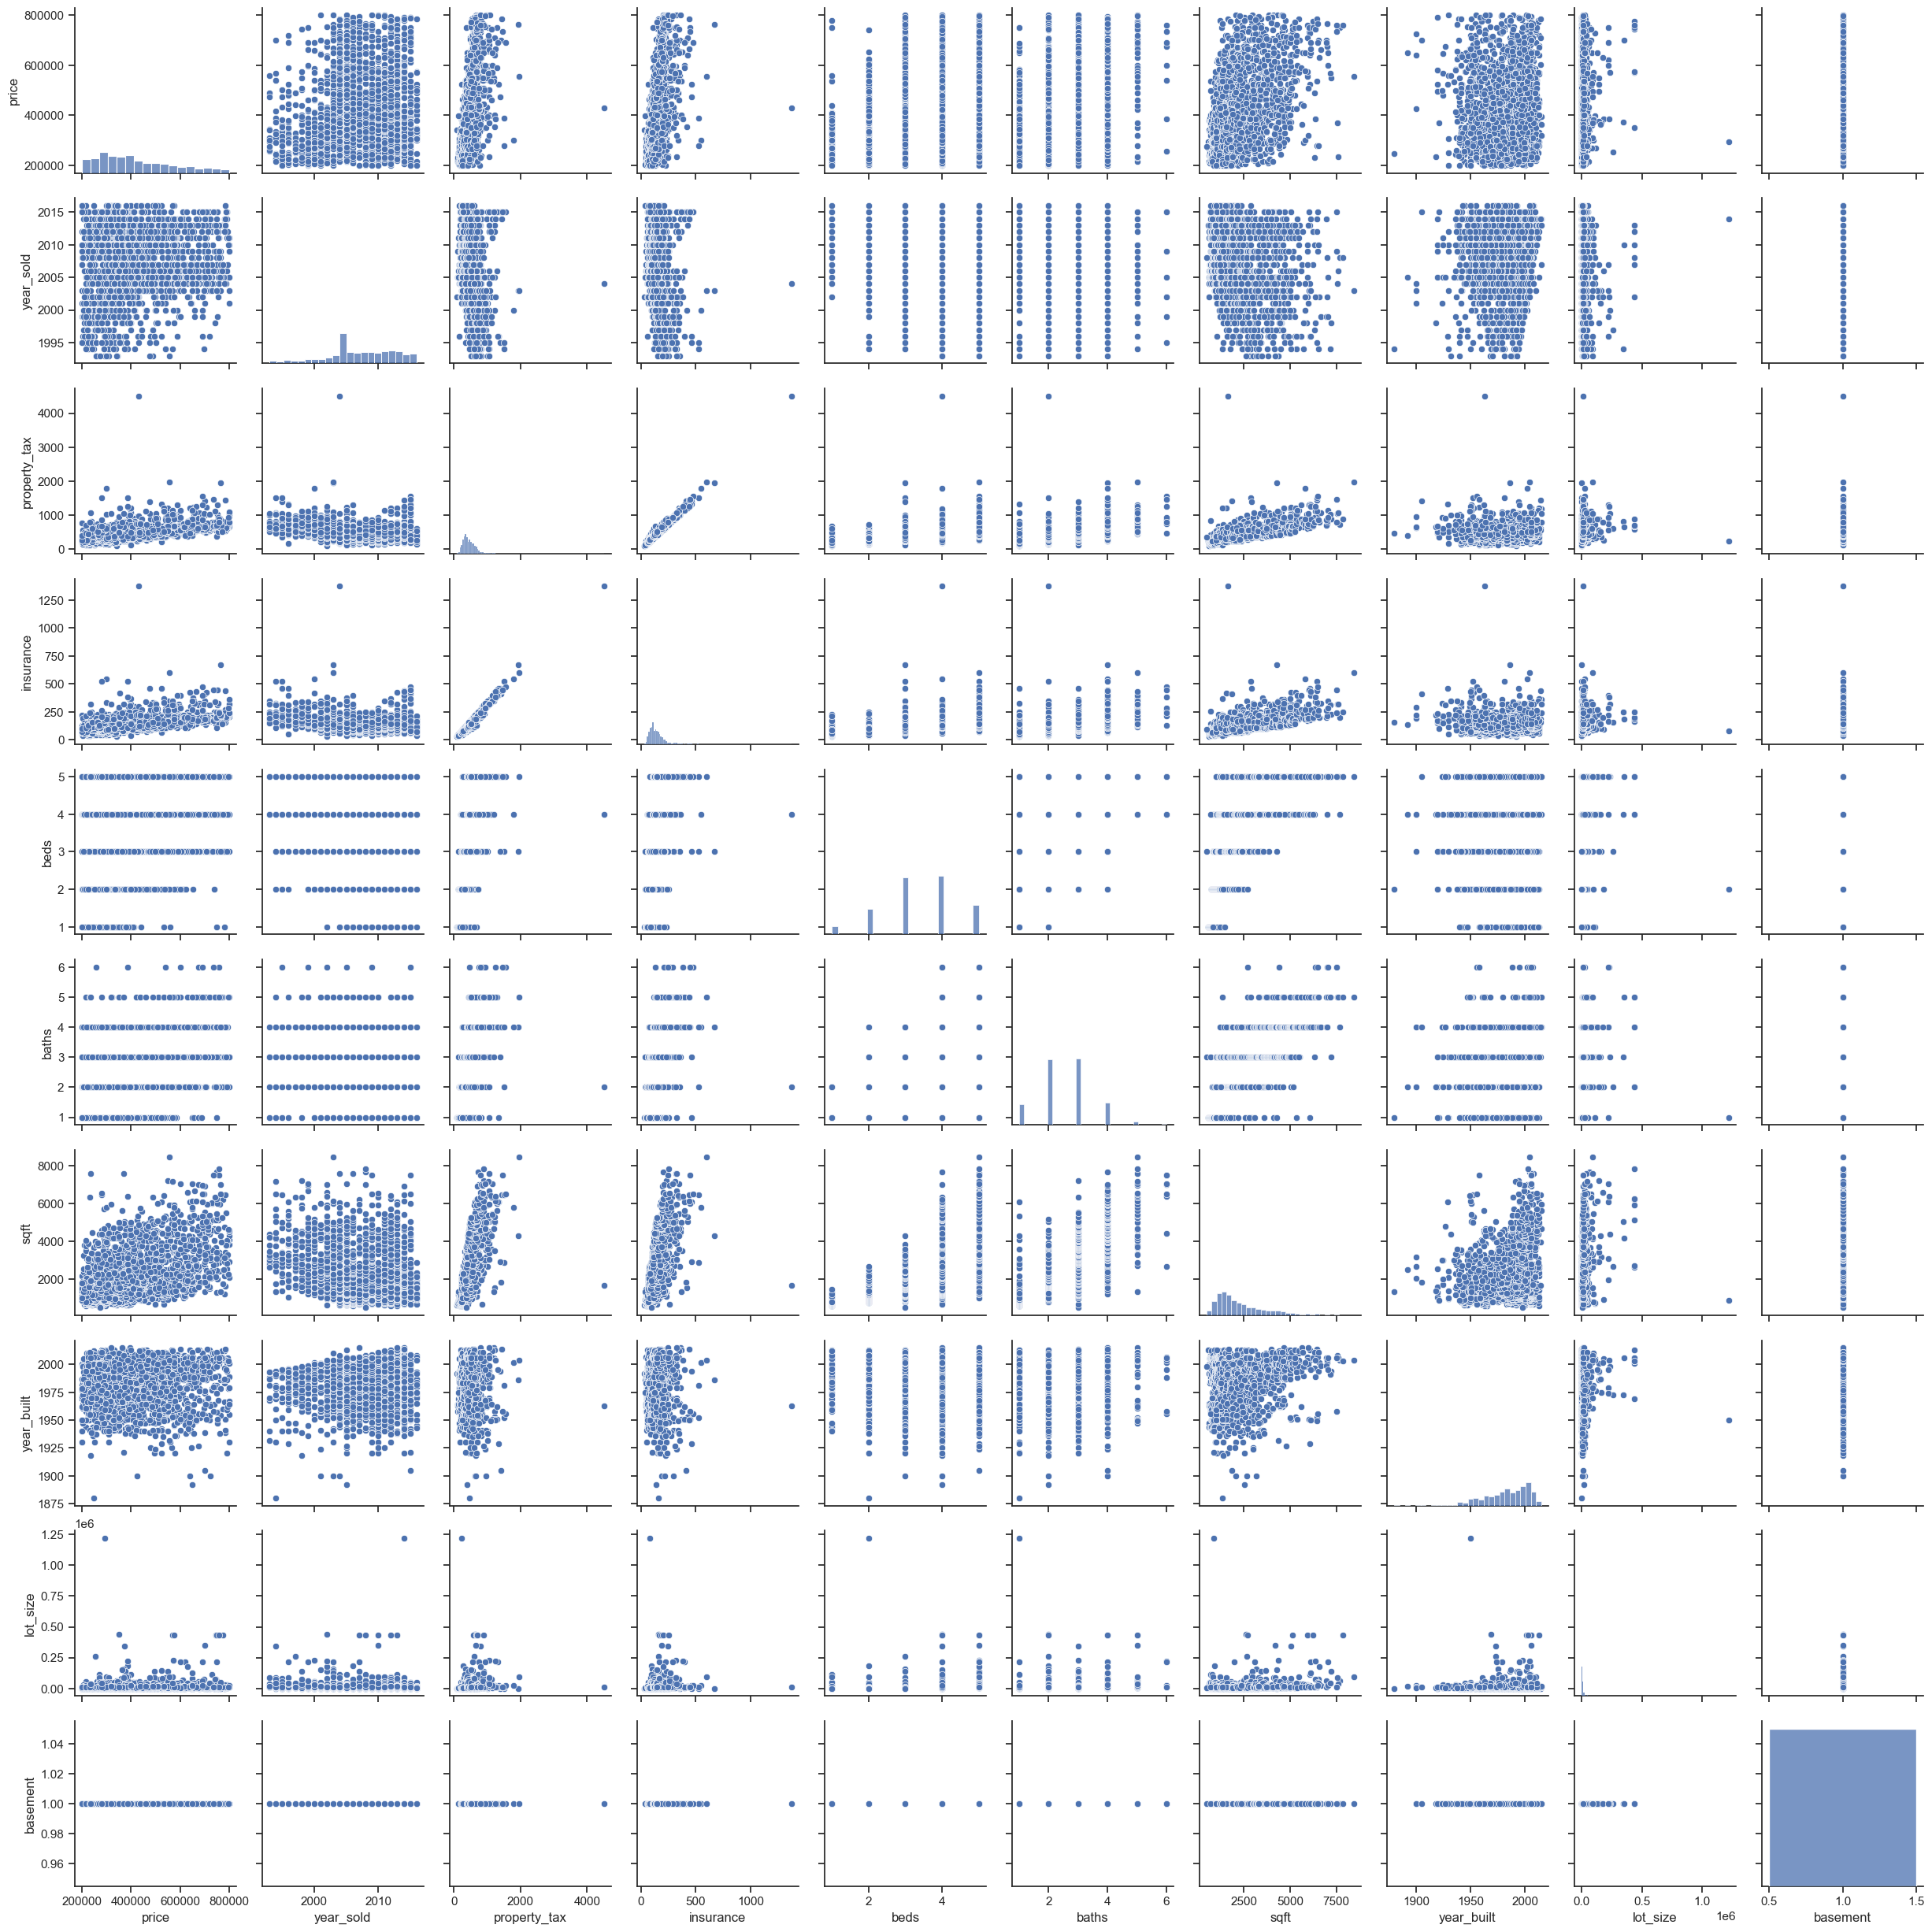

In [125]:
# Plot histogram grid using seaborn pairplot
sns.pairplot(df)

# Clear the text "residue" and show the plot    
plt.show()

<Axes: xlabel='insurance', ylabel='Count'>

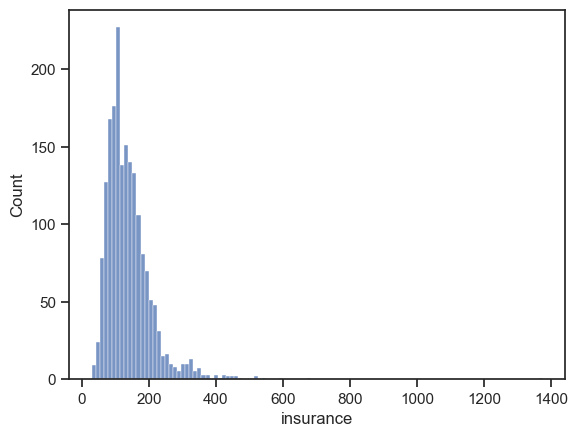

In [127]:
sns.histplot(df.insurance)

### Display the formal summary statistics.
* Pandas comes with a `.describe()` function for summary statistics.

#### Display summary statistics for the numerical features again. Then, answer the following questions:
1. In our dataset, what is the earliest transaction year (**year_sold**)?
2. Among all properties in our dataset, what is the maximum number of bedrooms (**beds**)?
3. In our dataset, do we see more variance in the number of bedrooms (**beds**) or the number of bathrooms (**baths**)?

In [114]:
# Summarize numerical features
df.describe()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0
mean,422839.807754,2007.111524,466.777483,140.454063,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0
std,151462.593276,5.196898,231.656645,72.929765,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0
min,200000.000000,1993.000000,88.000000,30.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0
25%,300000.000000,2004.000000,320.000000,94.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0
50%,392000.000000,2007.000000,426.000000,125.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0
75%,525000.000000,2011.000000,569.000000,169.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0
max,800000.000000,2016.000000,4508.000000,1374.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0


**We can also find other useful information such as mean, std (standard deviation), and the 25%, 50%, 75% quartiles.**

* For example, it looks like the `'basement'` feature only has the value `1`
* We know this because its standard deviation is `0`, while its min and max are both `1`
* `'basement'` also has missing values! You can tell because its count is only 1657 (out of a total of 1883 observations). 

### <span style="color:crimson">Note: We have to change the basement variable to a boolean type and handle the missing values.</span>

## <span style="color:RoyalBlue">Segmentations</span>

Segmentations are powerful ways to cut the data to observe the relationship between **categorical features and numeric features**.

#### Segment <code style="color:steelblue">'sqft'</code> by <code style="color:steelblue">'property_type'</code> and plot the boxplots.

<Axes: xlabel='sqft', ylabel='property_type'>

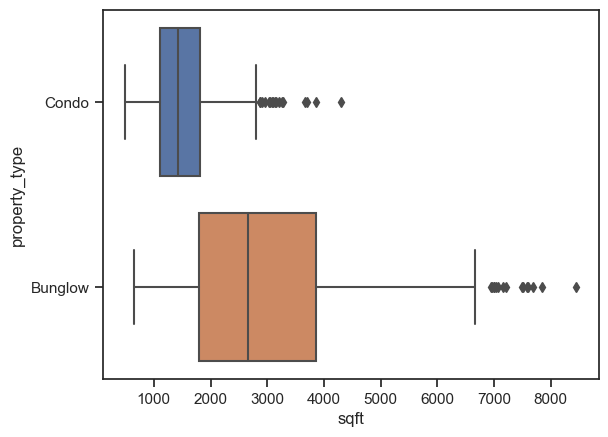

In [128]:
# Plot a box plot of sqft by property_type using seaborn
sns.boxplot(x='sqft', y='property_type', data=df)

#### After producing the plot, answer these questions:
* Which type of property is larger, on average?
* Which type of property sees greater variance in sizes?
* Does the difference in distributions between classes make intuitive sense?

<Axes: xlabel='price', ylabel='property_type'>

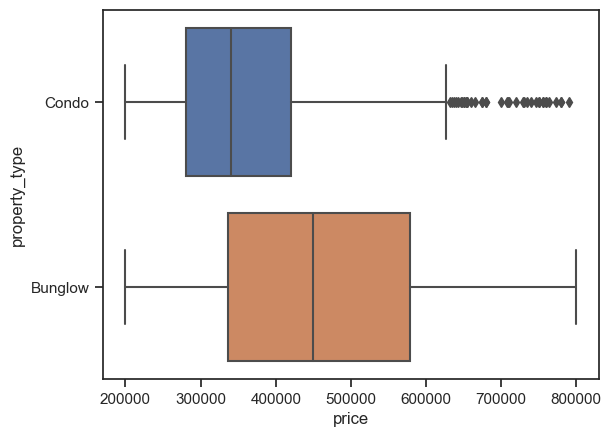

In [129]:
# Plot a box plot of price by property_type using seaborn
sns.boxplot(x='price', y='property_type', data=df)

#### After producing the plot, answer these questions:
* Which type of property is more expensive?
* What do those outliers signify in the `Bunglow` class?


### <span style="color:crimson">Note: Take care of these outliers </span>

## Correlations</span>

Finally, let's take a look at the relationships between numeric features and other numeric features.

**Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison.**
* Positive correlation means that as one feature increases, the other increases.
    <br>E.g. a child's age and their height.
* Negative correlation means that as one feature increases, the other decreases.
    <br>E.g. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

Pandas DataFrames come with a useful function for calculating correlations: `.corr()`

In [95]:
# Calculate correlations between numeric features
df.corr(numeric_only = True)

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement
price,1.000000,0.108782,0.535148,0.532947,0.384046,0.389375,0.469573,0.033138,0.130558,NaN
year_sold,0.108782,1.000000,-0.257703,-0.254706,-0.174081,-0.132110,-0.236190,-0.043301,-0.048207,NaN
property_tax,0.535148,-0.257703,1.000000,0.984724,0.547643,0.525776,0.660264,-0.046504,0.165800,NaN
insurance,0.532947,-0.254706,0.984724,1.000000,0.485776,0.475430,0.594049,-0.109521,0.146579,NaN
beds,0.384046,-0.174081,0.547643,0.485776,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN
baths,0.389375,-0.132110,0.525776,0.475430,0.644572,1.000000,0.682060,0.206141,0.132976,NaN
sqft,0.469573,-0.236190,0.660264,0.594049,0.691039,0.682060,1.000000,0.254589,0.246016,NaN
year_built,0.033138,-0.043301,-0.046504,-0.109521,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN
lot_size,0.130558,-0.048207,0.165800,0.146579,0.164399,0.132976,0.246016,0.000068,1.000000,NaN
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The variable now has a big dataframe that contains all of the correlations between numeric features.

That's too much information! After all, it's just a big rectangular dataset. So let's visualize this.

But first, it's important to notice that the correlations for `'basement'` all show as `NaN`. This is expected because right now that feature doesn't vary at all (its standard deviation is 0).

**Let's try to visualize the correlation grid and make it easier.**
* Seaborn's helpful `sns.heatmap()` function comes handy.
* The `cmap= argument` controls the color palette used in the heatmap. We will set it to the value of `RdBu_r`. So positive correlation values will be red and negative correlation values will be blue.
* By the way, what do you think will happen if you put in  `cmap=RdBu` instead of `RdBu_r`? Go ahead and try this out in your Workbook!

<Axes: >

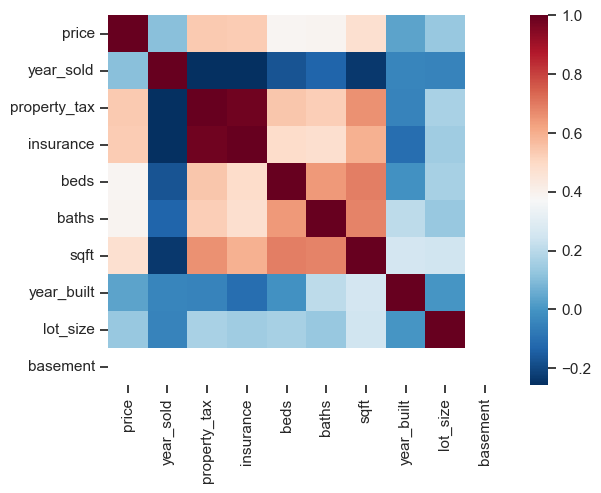

In [98]:
# Calculate correlations between numeric features
df.corr(numeric_only = True)
# Plot heatmap of correlations
sns.heatmap(df.corr(numeric_only = True), cmap = 'RdBu_r')

#### Next, when plotting a heatmap of correlations, it's often helpful to do 2 things:
1. Annotate the cell with their correlations values
2. Change the size of the figure

#### 1. First, change the background to white.
* Make the figure size 10 x 8  using <code style="color:steelblue">plt.figure(figsize=(10,8))</code> so that the plot is a bit larger.

#### 2. Next, display the correlation values in each cell.
* The <code style="color:steelblue">annot=</code> argument controls whether to annotate each cell with its value. By default, it's <code style="color:crimson">False</code>.
* To make the chart cleaner, multiply the <code style="color:steelblue">correlations</code> DataFrame by 100 before passing it to the heatmap function.
* Pass in the argument <code style="color:steelblue">fmt=<span style="color:crimson">'.0f'</span></code> to format the annotations to a whole number.

<Axes: >

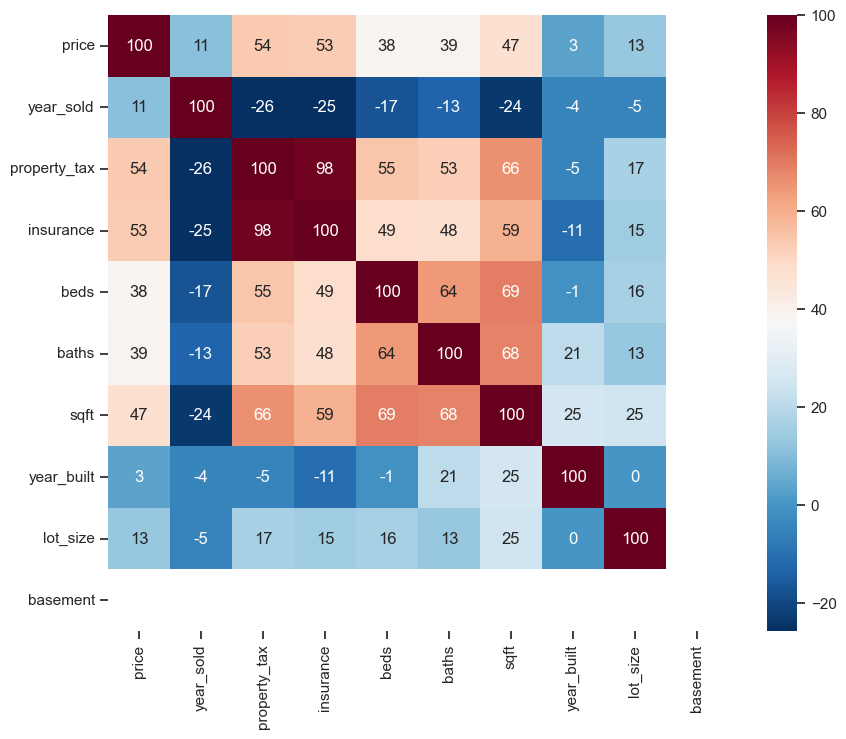

In [112]:
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))
# Plot heatmap of annotated correlations

sns.heatmap(df.corr(numeric_only = True) * 100, cmap = 'RdBu_r', annot = True, fmt = '.0f')

The most helpful way to interpret this correlation heatmap is to start by scanning the left side and find the row with our target variable, which is `'price'`.

* Then, scan across to see if any of the boxes are dark red (strong positive correlation) or dark blue (strong negative correlation).

Before jumping to the next module, I would recommend going back and reviewing the charts you made. This time, since you've already created them, you can move through more quickly and really start to understand the **story** behind the data.